In [1]:
import sys
sys.path.append('../')

In [2]:
from holidays import US
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from config import const


sns.set_theme()
sns_palette = sns.color_palette()
customPalette = sns.set_palette(sns.color_palette(const.colors))


sample = pd.read_pickle('../data/processed/time.pickle')
sample

,ID,Start_Time,End_Time,Timezone,year,hour,weekday,weekday_name,weekend,month,day
0,A-2047758,2019-06-12 10:10:56,2019-06-12 10:55:58,US/Central,2019,10,2,Wed,0,6,12
1,A-4694324,2022-12-03 23:37:14,2022-12-04 01:56:53,US/Eastern,2022,23,5,Sat,1,12,3
2,A-5006183,2022-08-20 13:13:00,2022-08-20 15:22:45,US/Pacific,2022,13,5,Sat,1,8,20
3,A-4237356,2022-02-21 17:43:04,2022-02-21 19:43:23,US/Central,2022,17,0,Mon,0,2,21
4,A-6690583,2020-12-04 01:46:00,2020-12-04 04:13:09,US/Pacific,2020,1,4,Fri,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...
499995,A-6077227,2021-12-15 07:30:00,2021-12-15 07:50:30,US/Pacific,2021,7,2,Wed,0,12,15
499996,A-6323243,2021-12-19 16:25:00,2021-12-19 17:40:37,US/Eastern,2021,16,6,Sun,1,12,19
499997,A-3789256,2022-04-13 19:28:29,2022-04-13 21:33:44,US/Mountain,2022,19,2,Wed,0,4,13
499998,A-7030381,2020-05-15 17:20:56,2020-05-15 17:50:56,US/Eastern,2020,17,4,Fri,0,5,15


In [3]:
sample['ymd']          = pd.to_datetime(sample['Start_Time'].dt.strftime("%Y-%m-%d"))
sample['md']           = sample['Start_Time'].dt.strftime("%m-%d")
sample

,ID,Start_Time,End_Time,Timezone,year,hour,weekday,weekday_name,weekend,month,day,ymd,md
0,A-2047758,2019-06-12 10:10:56,2019-06-12 10:55:58,US/Central,2019,10,2,Wed,0,6,12,2019-06-12,06-12
1,A-4694324,2022-12-03 23:37:14,2022-12-04 01:56:53,US/Eastern,2022,23,5,Sat,1,12,3,2022-12-03,12-03
2,A-5006183,2022-08-20 13:13:00,2022-08-20 15:22:45,US/Pacific,2022,13,5,Sat,1,8,20,2022-08-20,08-20
3,A-4237356,2022-02-21 17:43:04,2022-02-21 19:43:23,US/Central,2022,17,0,Mon,0,2,21,2022-02-21,02-21
4,A-6690583,2020-12-04 01:46:00,2020-12-04 04:13:09,US/Pacific,2020,1,4,Fri,0,12,4,2020-12-04,12-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,A-6077227,2021-12-15 07:30:00,2021-12-15 07:50:30,US/Pacific,2021,7,2,Wed,0,12,15,2021-12-15,12-15
499996,A-6323243,2021-12-19 16:25:00,2021-12-19 17:40:37,US/Eastern,2021,16,6,Sun,1,12,19,2021-12-19,12-19
499997,A-3789256,2022-04-13 19:28:29,2022-04-13 21:33:44,US/Mountain,2022,19,2,Wed,0,4,13,2022-04-13,04-13
499998,A-7030381,2020-05-15 17:20:56,2020-05-15 17:50:56,US/Eastern,2020,17,4,Fri,0,5,15,2020-05-15,05-15


In [4]:
from holidays import US

holidays = US(years=2016)
for date, name in holidays.items():
    print(date, name)

2016-01-01 New Year's Day
2016-05-30 Memorial Day
2016-07-04 Independence Day
2016-09-05 Labor Day
2016-11-11 Veterans Day
2016-11-24 Thanksgiving
2016-12-25 Christmas Day
2016-12-26 Christmas Day (Observed)
2016-01-18 Martin Luther King Jr. Day
2016-02-15 Washington's Birthday
2016-10-10 Columbus Day


In [5]:
def create_holiday_by_year_range(holiday_range = 0):
    years = sample['year'].drop_duplicates().sort_values().tolist()
    year_df = []
    for year in years:
        year_df += create_holiday_by_year(year, holiday_range)

    return year_df

def create_holiday_by_year(year, holiday_range = 0):
    start =  -holiday_range
    end = +holiday_range

    holidays = US(years=year)
    year_df = []
    for date, name in holidays.items():
        for index in range(start, end + 1, 1):
            frame = {}
            frame_date = pd.to_datetime(date) + pd.DateOffset(index)
            frame['holiday_date'] = frame_date
            frame['holiday_name'] = name
            frame['holiday_name_merge'] = name.replace(' (Observed)', '')
            frame['holiday_index'] = index

            year_df.append(frame)

    year_df.append(frame)
    return year_df

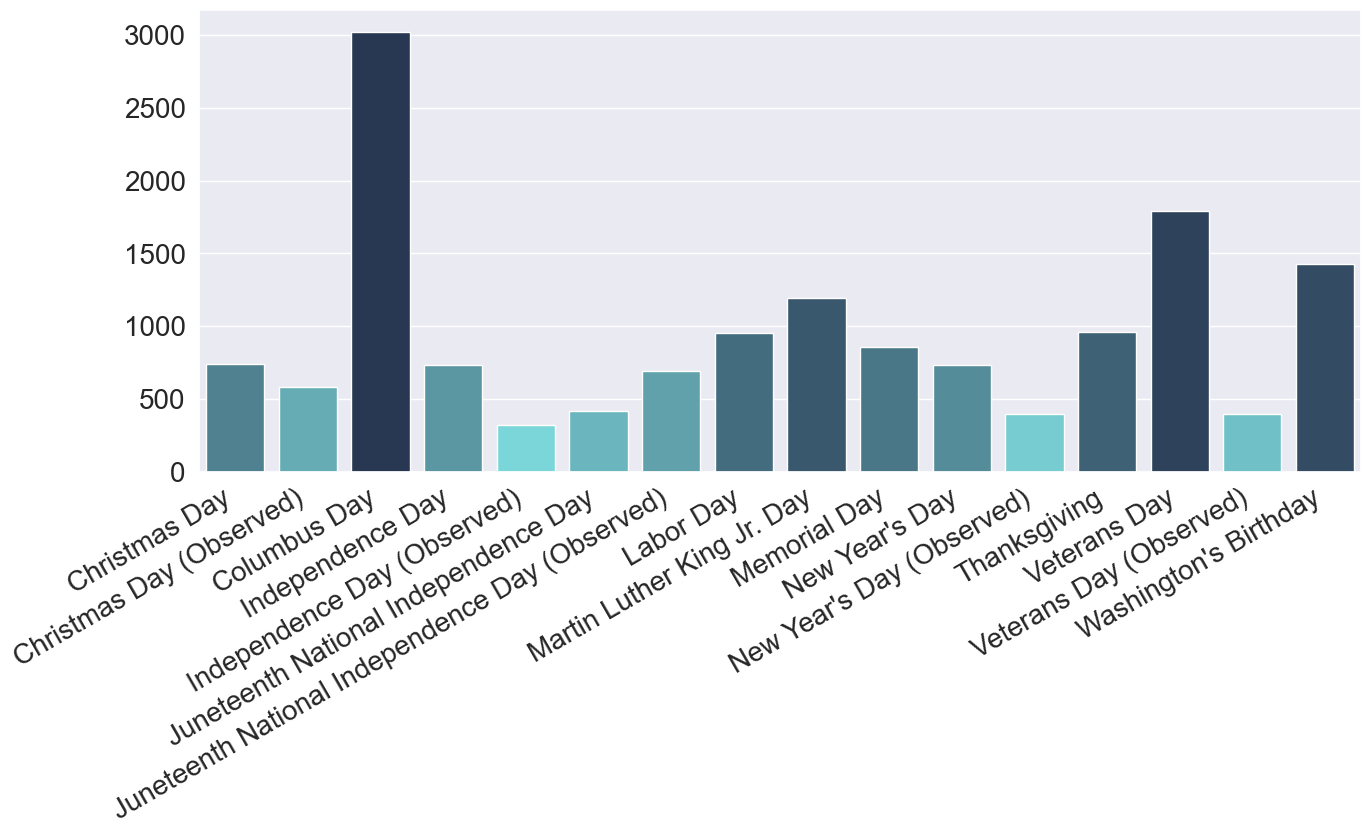

In [6]:
holidays_df = pd.DataFrame(create_holiday_by_year_range(0))
holiday_date = holidays_df['holiday_date'].drop_duplicates()
holiday_date

accidents_by_holiday = pd.merge(holidays_df, sample, left_on='holiday_date', right_on='ymd', how='inner')
accidents_by_holiday
x = (
    accidents_by_holiday
    .groupby(['year','holiday_date', 'holiday_name'])
    .agg(
        count=('ID', 'count')
    )
    .reset_index()
)
x

zz = (
    x
    .groupby(['holiday_name'])
    .agg(
        sum=('count', 'sum'),
        mean=('count', 'mean'),
        median=('count', 'median'),
    )
    .reset_index()
)
zz

pal = sns.color_palette(f"blend:{const.colors[0]},{const.colors[-1]}", len(zz))
pal = pd.Series(pal)
rank = zz['sum'].rank(ascending=False, method='first').astype(int) - 1

fig, ax1 = plt.subplots(figsize=(15,6))
sns.barplot(x='holiday_name', y='sum', data=zz, ax=ax1, palette=pal[::-1][rank].tolist(), hue='holiday_name',legend=False)


xaxis_ticks = ax1.get_xticklabels()
ax1.set_xticks(range(len(xaxis_ticks)))
ax1.set_xticklabels(xaxis_ticks, rotation=30, ha='right')  # Adjust rotation angle as needed

ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)


# ax1.set(xlabel=None, ylabel=None)
# ax2= ax1.twinx()
# ax2.grid(False)

# sns.pointplot(x='holiday_name', y='mean', data=zz, marker='o', label='Mean', ax=ax2, linewidth=3, color=sns_palette[0])
# sns.pointplot(x='holiday_name', y='median', data=zz, marker='o', label='Median', ax=ax2, linewidth=3, color=sns_palette[1])


# ax1.set_ylabel('Sum', fontsize=20)
# ax1.set_xlabel(None, fontsize=10)

ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
# ax2.tick_params(axis='y', labelsize=20)

plt.xlabel('', fontsize=20)
plt.ylabel('', fontsize=20)
plt.show()

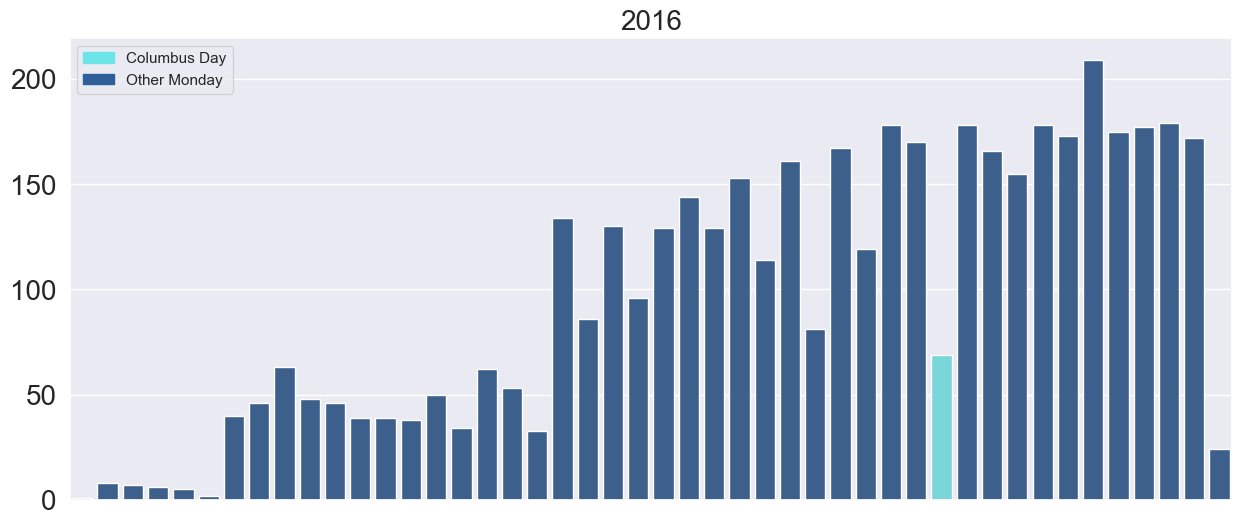

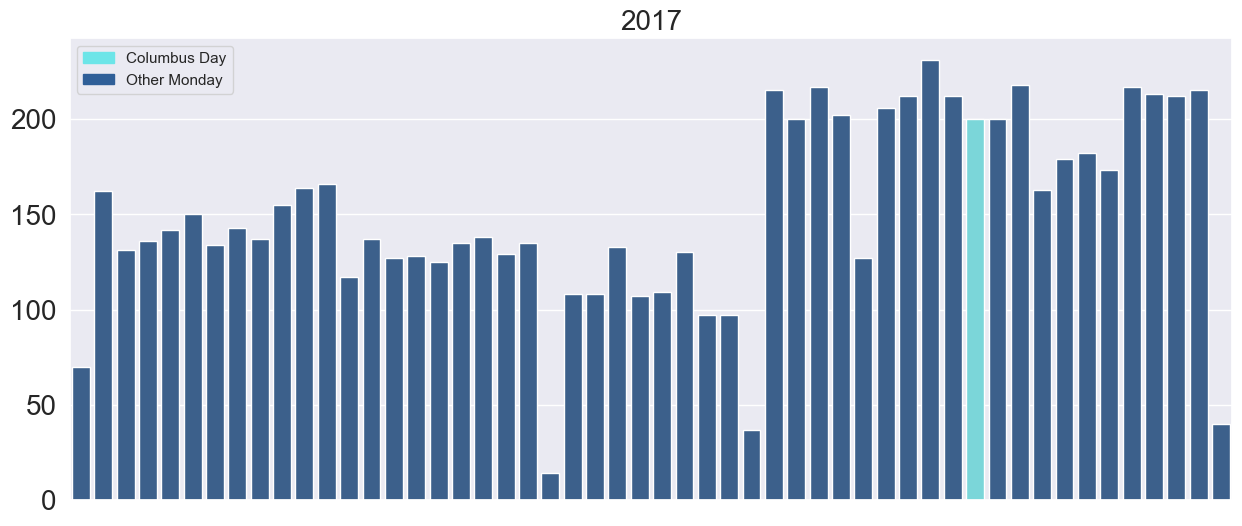

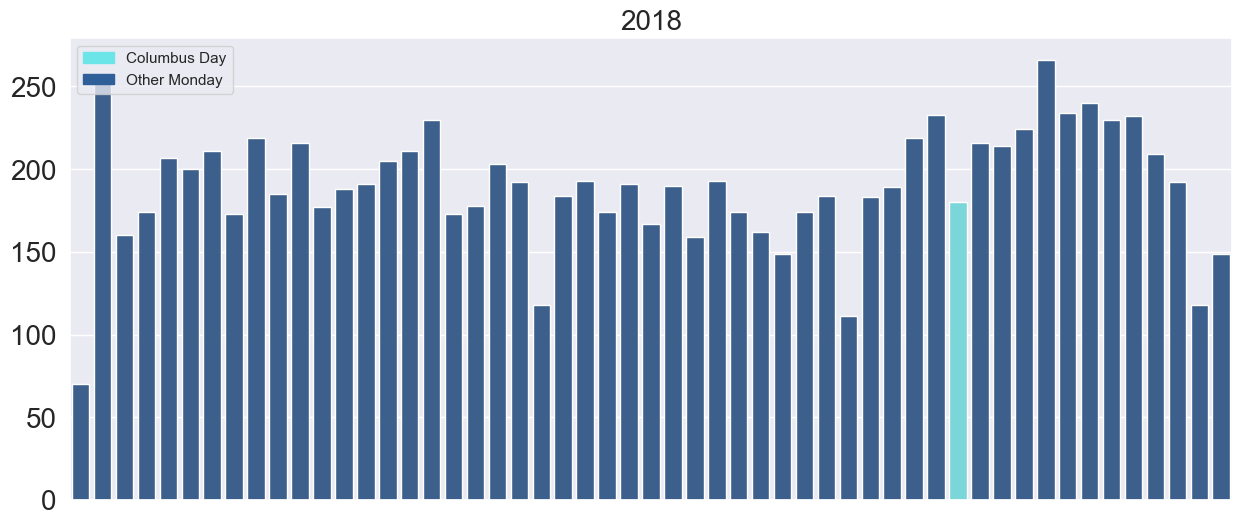

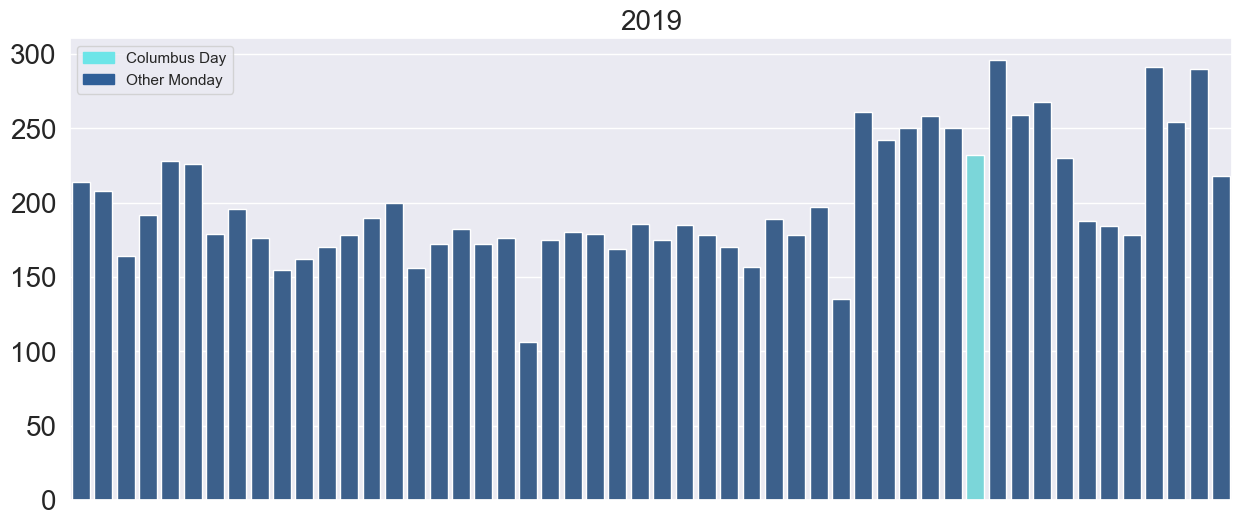

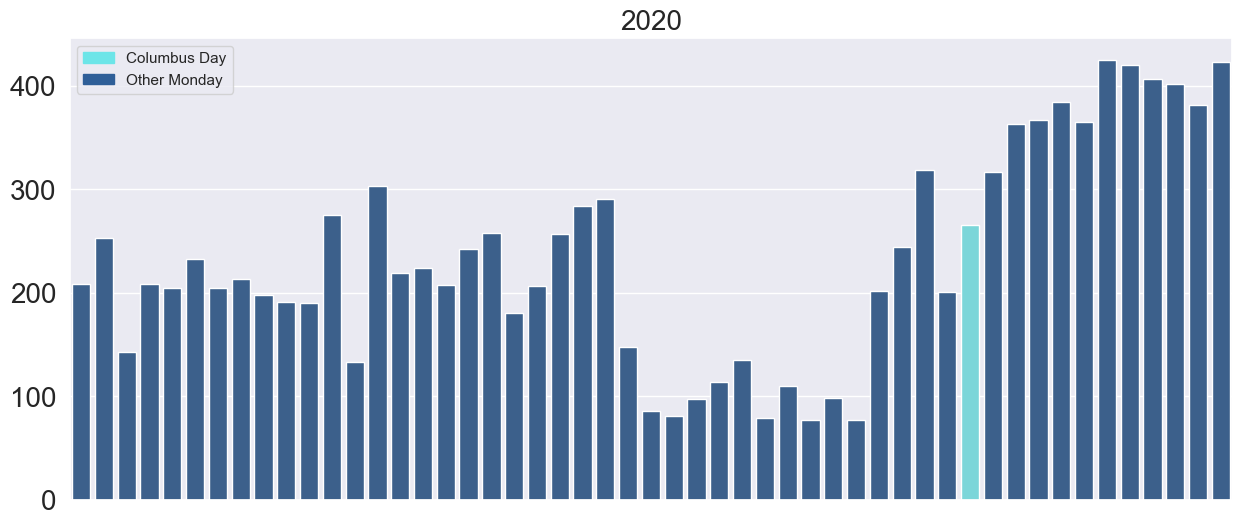

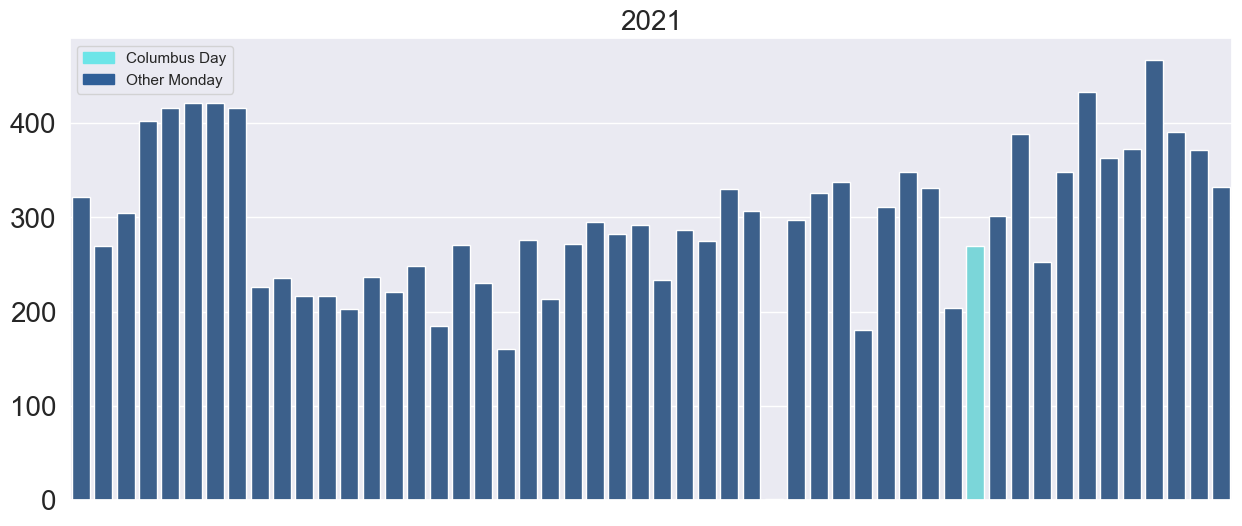

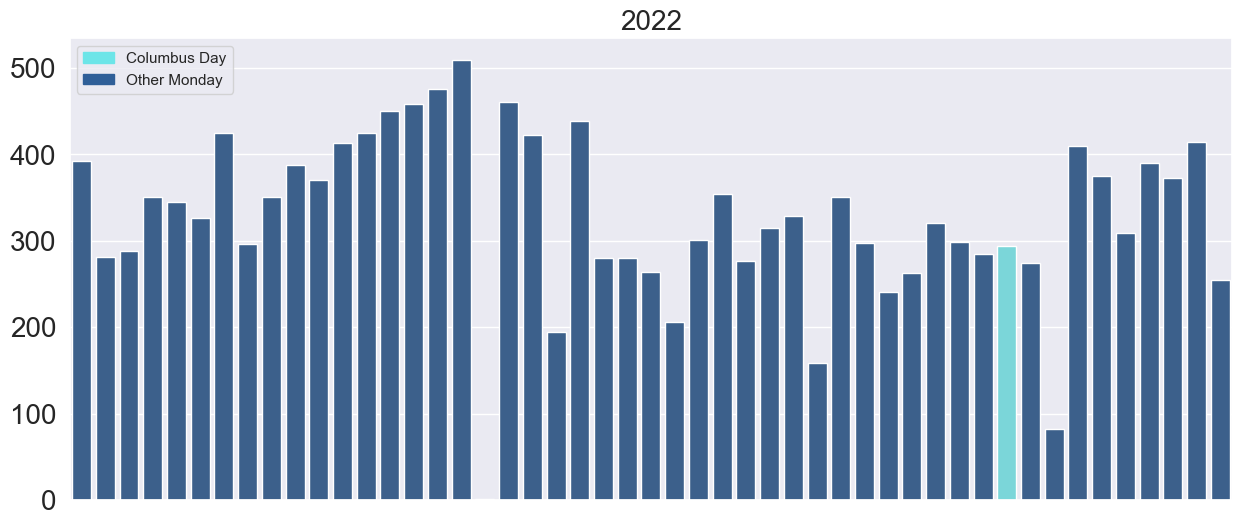

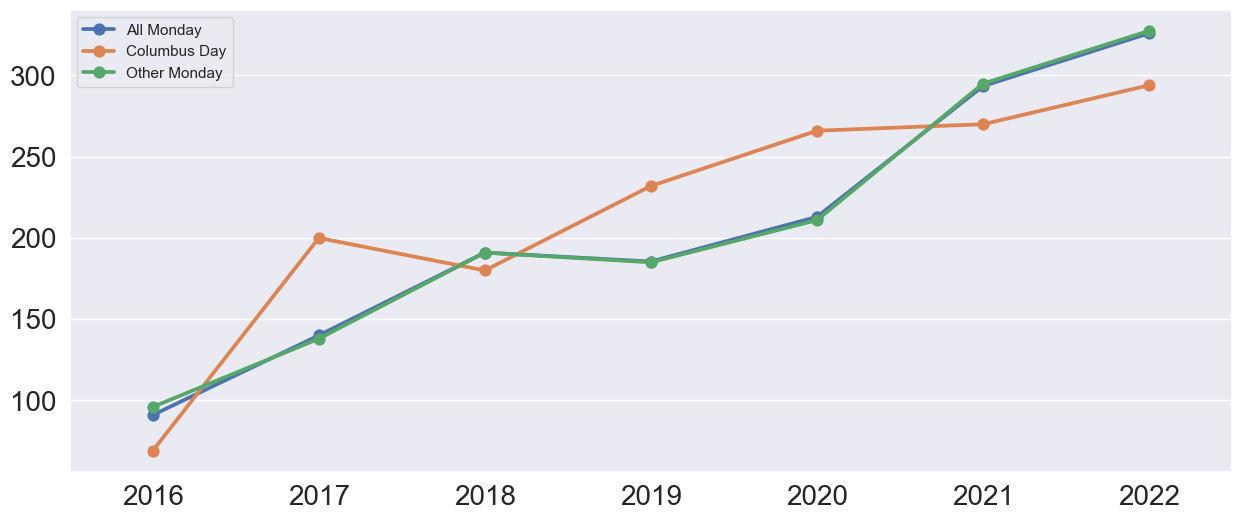

In [7]:
import matplotlib.patches as mpatches

holidays_df = pd.DataFrame(create_holiday_by_year_range(0))
b = holidays_df[(holidays_df['holiday_name'] == 'Columbus Day')]['holiday_date'].drop_duplicates()
b
q = [i.strftime("%Y-%m-%d") for i in b.tolist()]


median = {
    'year' : [],
    'all' : [],
    'holiday' : [],
    'non-holiday' : [],
}

monday_map = {
    'columbus_day': {'label': 'Columbus Day', 'color': const.colors[-1]},
    'others_day': {'label': 'Other Monday', 'color': const.colors[2]}
}

for year in range(2016, 2023):
    x =(
        sample[(sample['weekday_name'] == 'Mon') & (sample['year'] == year)]
        .groupby(['ymd'])
        .agg(
            count=('ID', 'count')
        )
        .reset_index()
    )
    x

    median['year'].append(year)
    median['all'].append(x['count'].median())
    median['holiday'].append(x[x['ymd'].isin(b)]['count'].median())
    median['non-holiday'].append(x[~x['ymd'].isin(b)]['count'].median())

    xticks = [i.strftime("%Y-%m-%d") for i in x['ymd']]

    fig, ax1 = plt.subplots(figsize=(15,6))
    sns.set(rc={'figure.figsize':(15,6)})

    palette= sns.color_palette([monday_map['columbus_day']['color'] if i in q else monday_map['others_day']['color'] for i in xticks])


    sns.barplot(
        data=x,
        x='ymd', y='count'
        , palette=palette, hue='ymd', legend=False
        , ax=ax1
    )

    legend_labels = {
        monday_map['columbus_day']['label']: monday_map['columbus_day']['color'],
        monday_map['others_day']['label']: monday_map['others_day']['color']
    }
    handles = [mpatches.Patch(color=legend_labels[label], label=label) for label in legend_labels]
    ax1.legend(handles=handles, loc='upper left')

    ax1.set_xticklabels([])

    ax1.tick_params(axis='x', labelsize=20)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.set_title(year, fontsize=20)

    plt.xlabel('', fontsize=20)
    plt.ylabel('', fontsize=20)
    plt.show()
    
fig, ax = plt.subplots(figsize=(15,6))
sns.pointplot(data=median, x='year', y='all', label='All Monday', ax=ax)
sns.pointplot(data=median, x='year', y='holiday', label=monday_map['columbus_day']['label'], ax=ax)
sns.pointplot(data=median, x='year', y='non-holiday', label=monday_map['others_day']['label'], ax=ax)
sns.set(rc={'figure.figsize':(15,6)})

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.xlabel('', fontsize=20)
plt.ylabel('', fontsize=20)
plt.show()

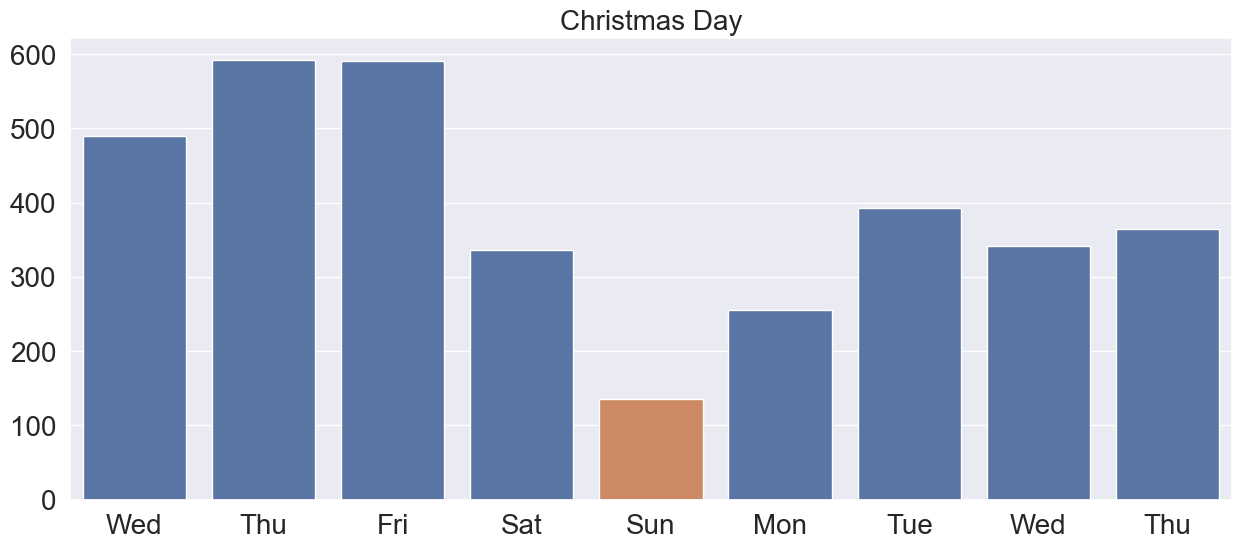

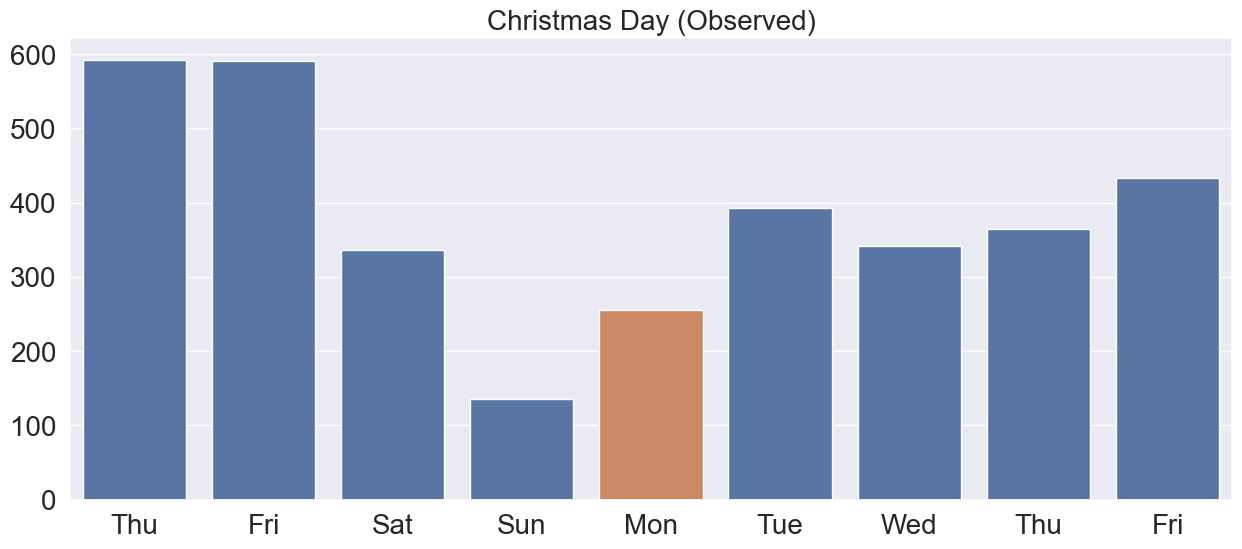

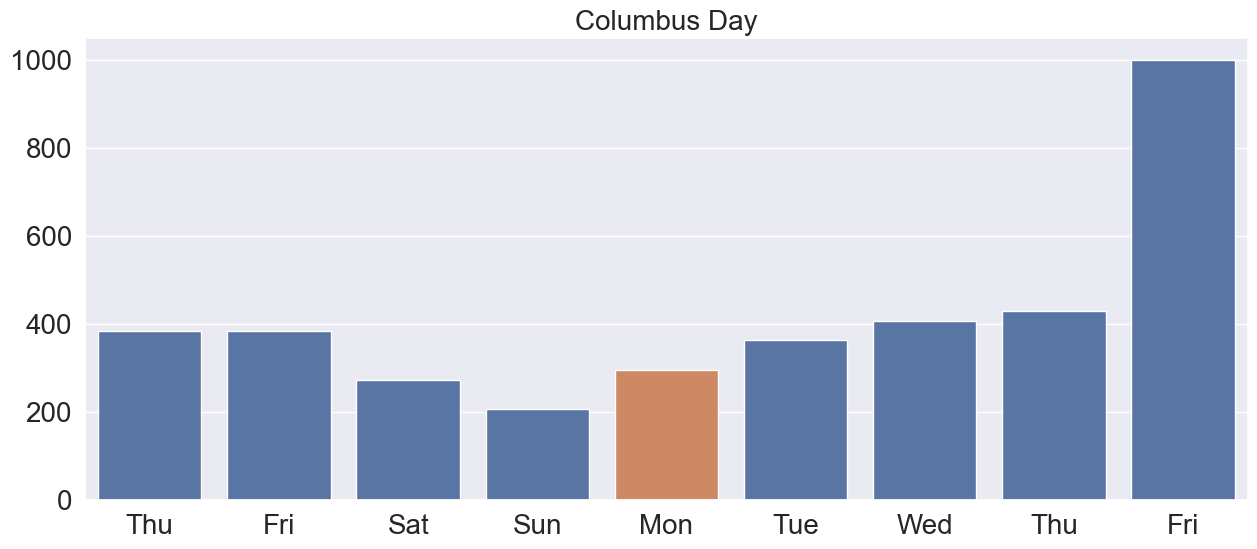

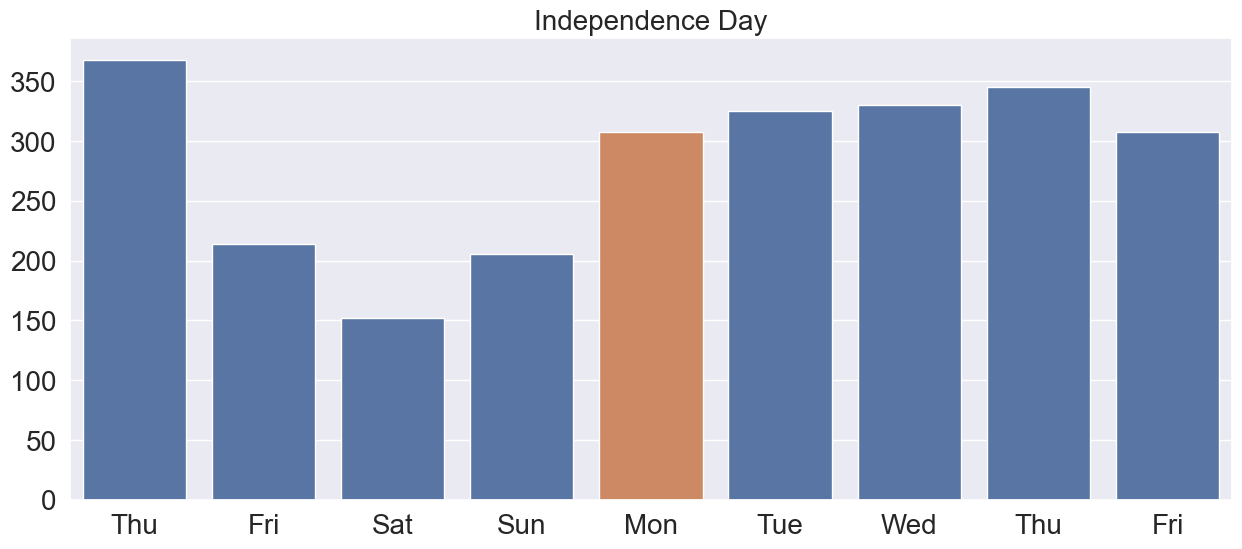

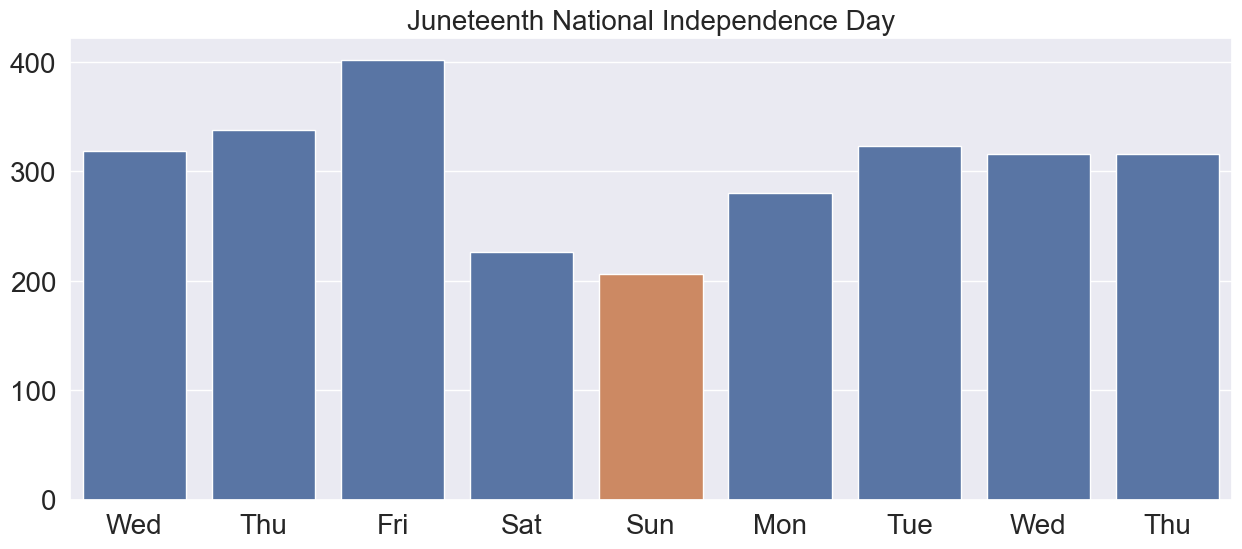

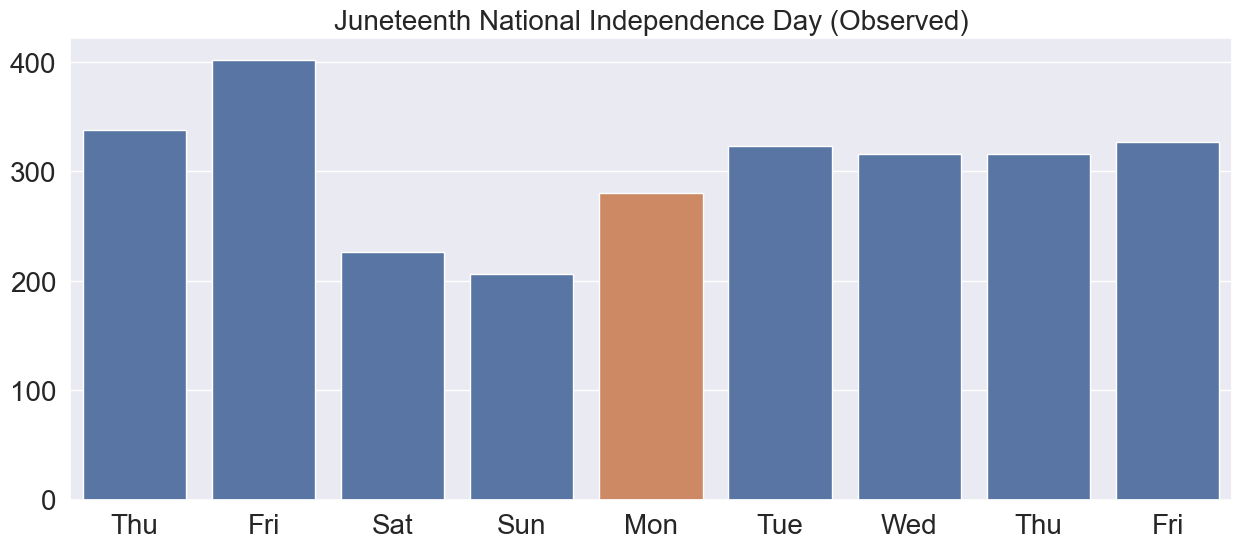

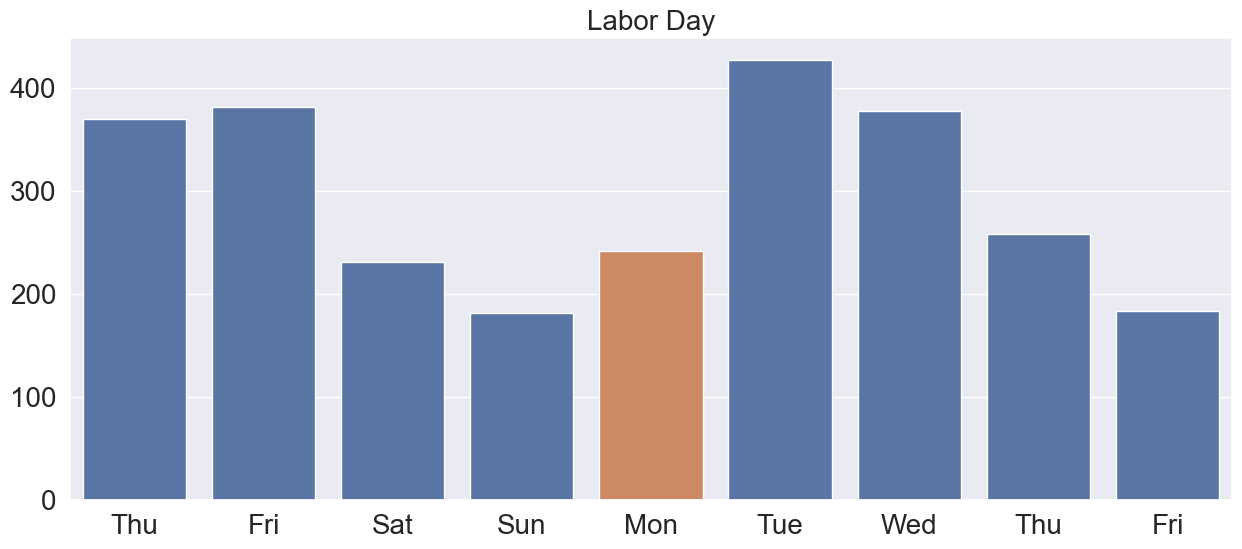

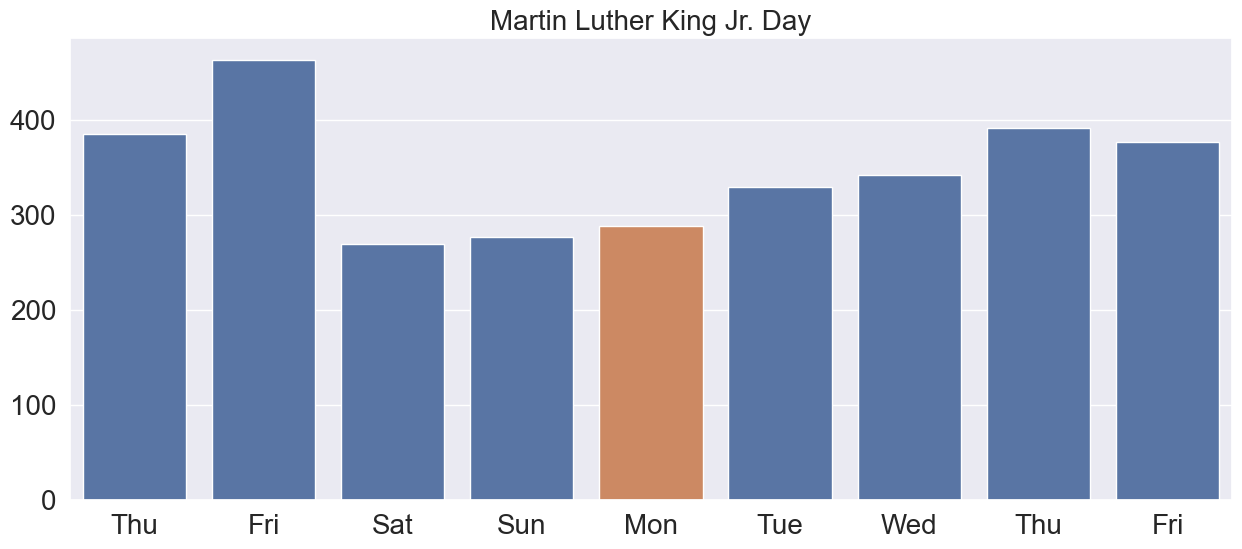

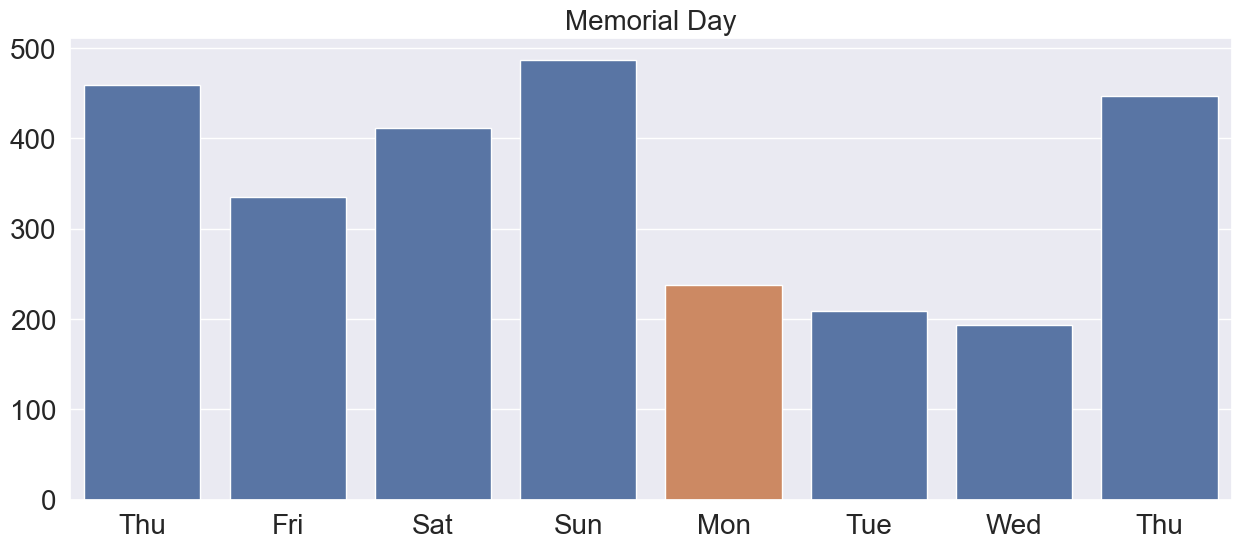

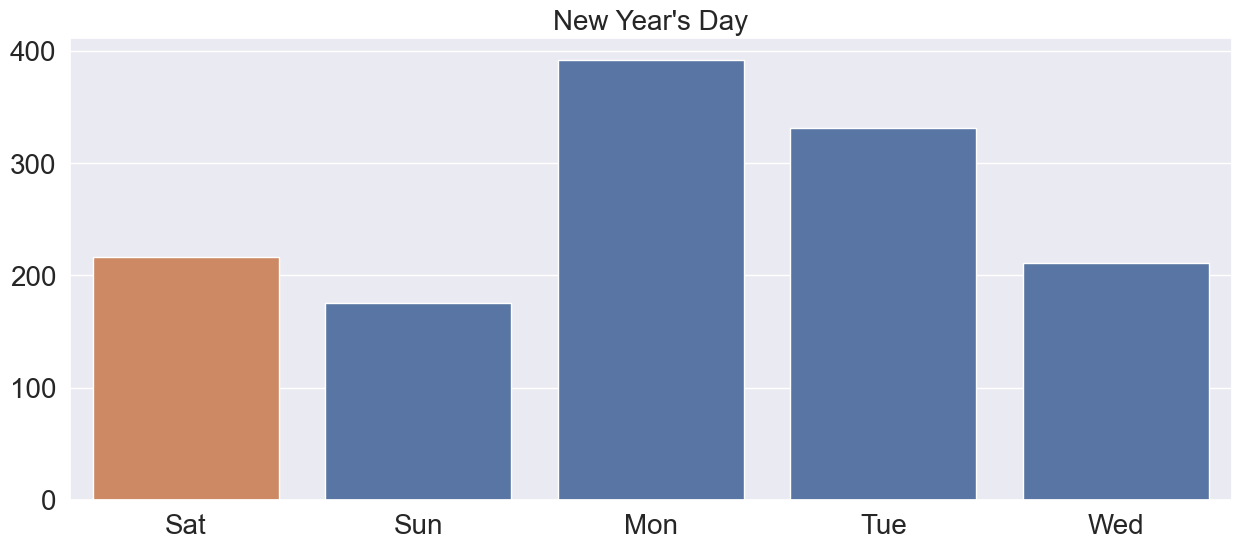

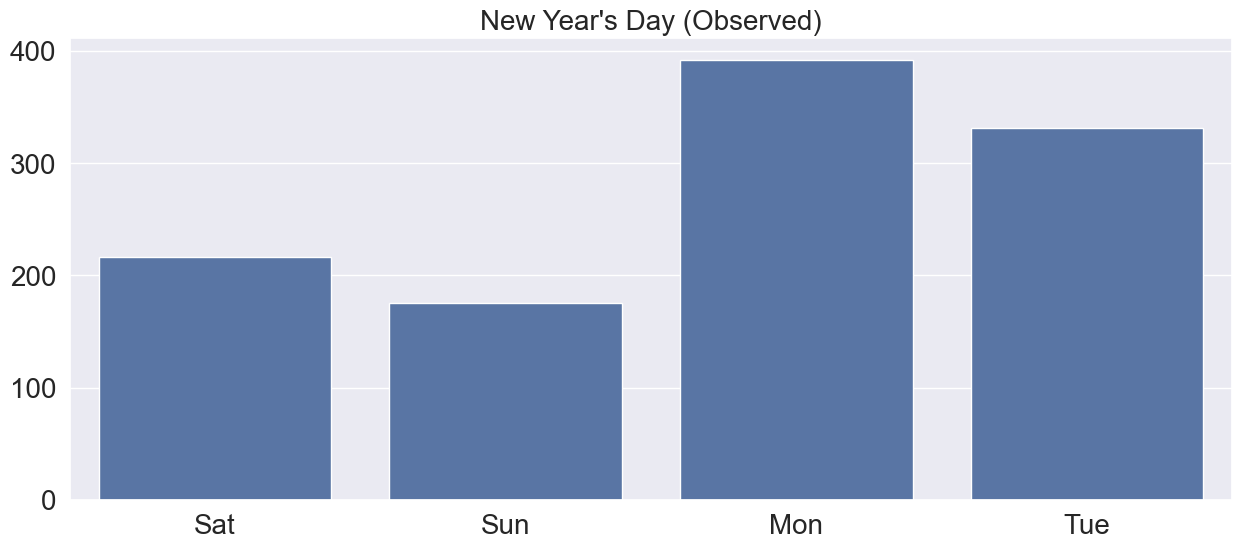

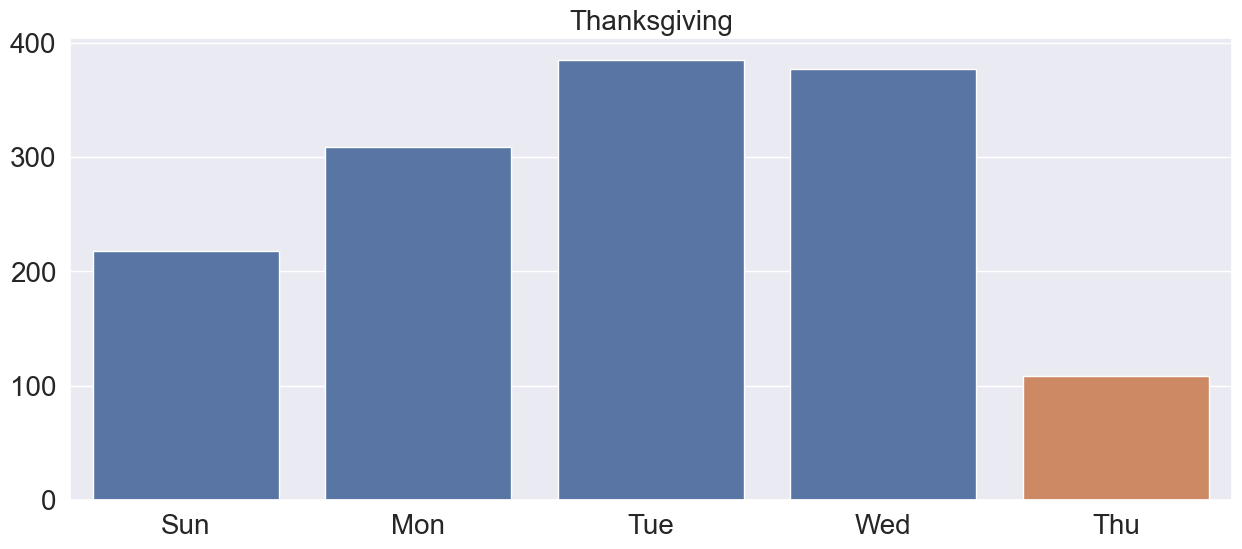

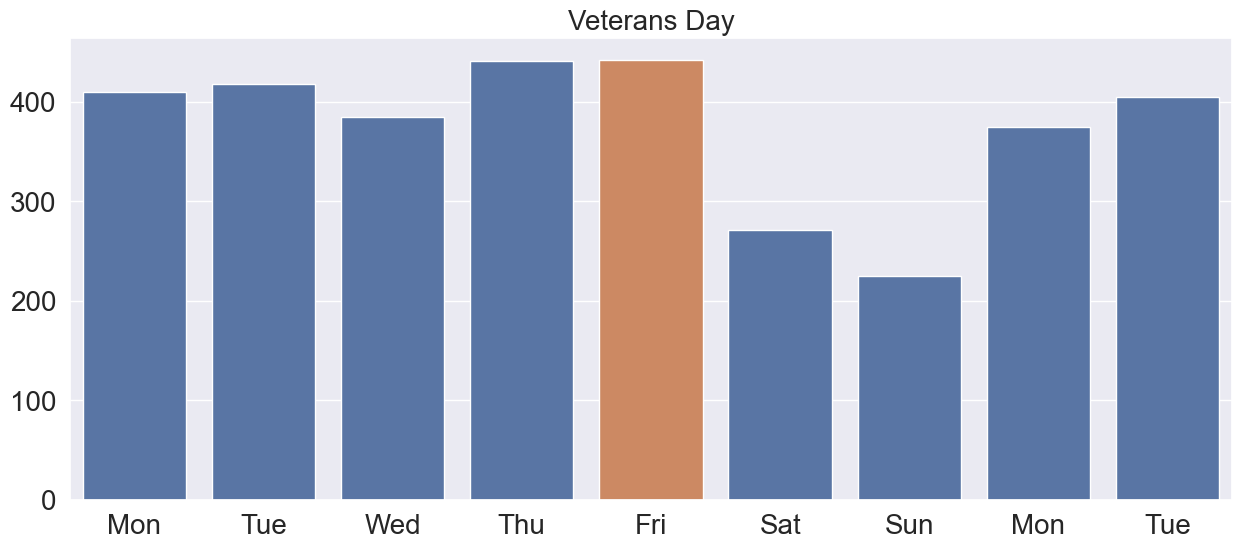

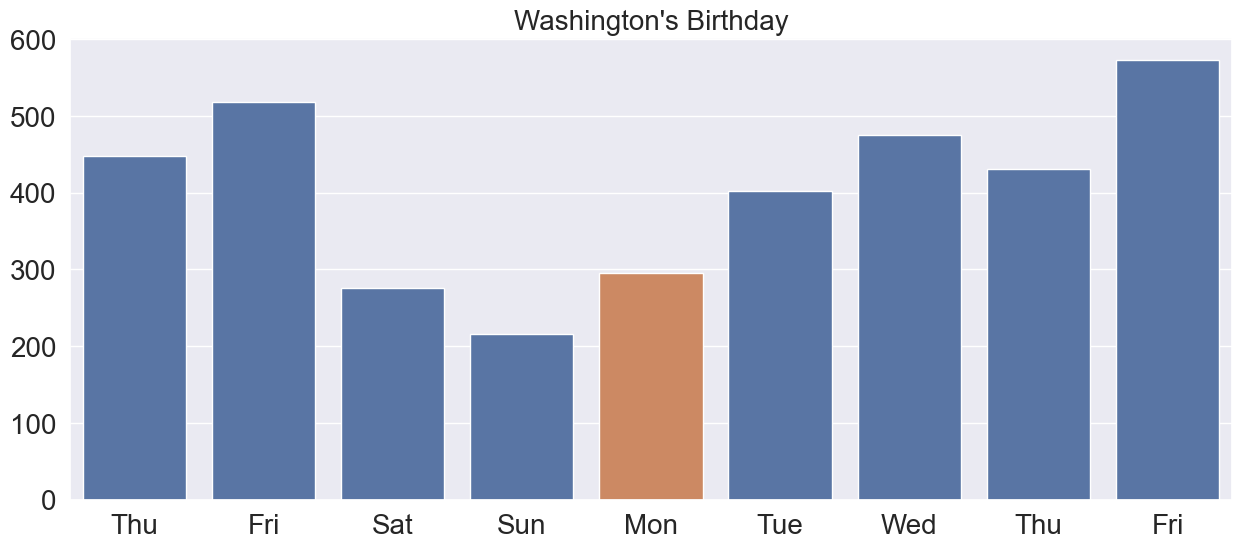

In [8]:
holidays_df = pd.DataFrame(create_holiday_by_year_range(4))
holidays_df
holiday_date = holidays_df['holiday_date'].drop_duplicates()
holiday_date


sample['wy'] = sample['Start_Time'].dt.strftime('%U-%Y')

accidents_by_holiday = pd.merge(holidays_df, sample, left_on='holiday_date', right_on='ymd', how='right')
accidents_by_holiday

x = (
    accidents_by_holiday[(accidents_by_holiday['year'] == 2022 )  & (accidents_by_holiday['ymd'].isin(holiday_date))]
    .groupby(['holiday_name', 'holiday_index', 'weekday', 'weekday_name', 'day'])
    .agg(
        count=('ID', 'count')
    )
    .reset_index()
)
x
y = x['holiday_name'].drop_duplicates().tolist()
for i in y:
    df = x[x['holiday_name'] == i]
    color = [sns_palette[1] if i == 0 else sns_palette[0] for i in df['holiday_index']]
    category_palette = sns.color_palette(color)

    # print(category_palette)
    # break

    fig, ax1 = plt.subplots(figsize=(15,6))
    sns.set(rc={'figure.figsize':(15,6)})

    sns.barplot(data=df, x='day', y='count', label='count', ax=ax1, palette=category_palette, hue='day', legend=False)
    ax1.set_title(i, fontsize=20)
    ax1.set_xticks(range(len(df['weekday_name'])))
    ax1.set_xticklabels(df['weekday_name'])

    ax1.tick_params(axis='x', labelsize=20)
    ax1.tick_params(axis='y', labelsize=20)

    plt.xlabel('', fontsize=20)
    plt.ylabel('', fontsize=20)
    plt.show()